#### [ 남북한발전전력량 분석 및 시각화 ]
- 데이터셋 : 남북한발전전력량.xlsx
- 데이터 구성
    * 1990년 ~ 2016년까지 수력, 화력, 원자력, 신재생 에너지 데이터
- 분석 주제 : 남한과 북한의 에너지 데이터 변화 분석

In [23]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 한글폰트 설정 => 폰트 매니저 모듈
from matplotlib import font_manager as fm, rc

# 적용할 폰트 파일
font_path = "MALGUN.TTF"

# 폰트 패밀리 이름 가져오기
font_name = fm.FontProperties(fname = font_path).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font', family = font_name)

In [5]:
# [2] 데이터 준비
FILE_DATA = r"C:\Users\KDP-2\OneDrive\바탕 화면\Python\EX_PANDAS06\Data\남북한발전전력량.xlsx"

In [6]:
# [3] Excel => DataFrame 형태로 저장
dataDF = pd.read_excel(FILE_DATA)

In [7]:
# [4] 데이터 확인
dataDF.info()
print(dataDF.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   전력량 (억㎾h)  2 non-null      object
 1   발전 전력별     9 non-null      object
 2   1990       9 non-null      object
 3   1991       9 non-null      object
 4   1992       9 non-null      object
 5   1993       9 non-null      object
 6   1994       9 non-null      object
 7   1995       9 non-null      object
 8   1996       9 non-null      object
 9   1997       9 non-null      object
 10  1998       9 non-null      object
 11  1999       9 non-null      object
 12  2000       9 non-null      object
 13  2001       9 non-null      object
 14  2002       9 non-null      object
 15  2003       9 non-null      object
 16  2004       9 non-null      object
 17  2005       9 non-null      object
 18  2006       9 non-null      object
 19  2007       9 non-null      object
 20  2008       9 non-null      object
 2

In [8]:
# [5] 데이터 전처리 및 가공
# - 멀티 인덱싱 : 컬럼 ==> 행 인덱스 설정
# - (1) NaN 컬럼에 대한 처리
# - (2) 두개의 컬럼을 행 인덱스로 설정


In [9]:
# - (1) NaN 컬럼에 대한 처리
dataDF.columns[0]

'전력량 (억㎾h)'

In [10]:
dataDF[dataDF.columns[0]]   # dataDF["전력량 (억kwh)"]

0     남한
1    NaN
2    NaN
3    NaN
4    NaN
5     북한
6    NaN
7    NaN
8    NaN
Name: 전력량 (억㎾h), dtype: object

In [11]:
# dataDF[dataDF.columns[0]].fillna(method = 'ffill') (오류 주의)
dataDF[dataDF.columns[0]].ffill(inplace = True)

In [12]:
dataDF.head(5)

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,남한,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,남한,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,남한,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,남한,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195


In [13]:
dataDF2 = dataDF.set_index([dataDF.columns[0], dataDF.columns[1]])
dataDF2.index

MultiIndex([('남한',  '합계'),
            ('남한',  '수력'),
            ('남한',  '화력'),
            ('남한', '원자력'),
            ('남한', '신재생'),
            ('북한',  '합계'),
            ('북한',  '수력'),
            ('북한',  '화력'),
            ('북한', '원자력')],
           names=['전력량 (억㎾h)', '발전 전력별'])

In [14]:
dataDF2 = dataDF2.replace("-", np.nan)
dataDF2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9 entries, ('남한', '합계') to ('북한', '원자력')
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1990    7 non-null      float64
 1   1991    7 non-null      float64
 2   1992    7 non-null      float64
 3   1993    7 non-null      float64
 4   1994    7 non-null      float64
 5   1995    7 non-null      float64
 6   1996    7 non-null      float64
 7   1997    7 non-null      float64
 8   1998    7 non-null      float64
 9   1999    7 non-null      float64
 10  2000    7 non-null      float64
 11  2001    7 non-null      float64
 12  2002    7 non-null      float64
 13  2003    7 non-null      float64
 14  2004    7 non-null      float64
 15  2005    7 non-null      float64
 16  2006    7 non-null      float64
 17  2007    7 non-null      float64
 18  2008    7 non-null      float64
 19  2009    7 non-null      float64
 20  2010    7 non-null      float64
 21  2011    7 non-null  

C:\Users\KDP-2\AppData\Local\Temp\ipykernel_11908\2573250063.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataDF2 = dataDF2.replace("-", np.nan)


In [15]:
dataDF2.isna()

1990   1991   1992   1993   1994   1995   1996   1997  \
전력량 (억㎾h) 발전 전력별                                                           
남한        합계      False  False  False  False  False  False  False  False   
          수력      False  False  False  False  False  False  False  False   
          화력      False  False  False  False  False  False  False  False   
          원자력     False  False  False  False  False  False  False  False   
          신재생      True   True   True   True   True   True   True   True   
북한        합계      False  False  False  False  False  False  False  False   
          수력      False  False  False  False  False  False  False  False   
          화력      False  False  False  False  False  False  False  False   
          원자력      True   True   True   True   True   True   True   True   

                   1998   1999  ...   2007   2008   2009   2010   2011   2012  \
전력량 (억㎾h) 발전 전력별                ...                                             
남한        합계      False  False  ...  False  False  False  False  False  False   
          수력      False  False  ...  False  False  False  False  False  False   
          화력      False  False  ...  False  False  False  False  False  False   
          원자력     False  False  ...  False  False  False  False  False  False   
          신재생      True   True  ...   True   True   True   True   True  False   
북한        합계      False  False  ...  False  False  False  False  False  False   
          수력      False  False  ...  False  False  False  False  False  False   
          화력      False  False  ...  False  False  False  False  False  False   
          원자력      True   True  ...   True   True   True   True   True   True   

                   2013   2014   2015   2016  
전력량 (억㎾h) 발전 전력별                              
남한        합계      False  False  False  False  
          수력      False  False  False  False  
          화력      False  False  False  False  
          원자력     False  False  False  False  
          신재생     False  False  False  False  
북한        합계      False  False  False  False  
          수력      False  False  False  False  
          화력      False  False  False  False  
          원자력      True   True   True   True  

[9 rows x 27 columns]

In [16]:
dataDF2.loc[(dataDF2.index[4][0], dataDF2.index[4][1])].fillna(dataDF2.loc[(dataDF2.index[4][0], dataDF2.index[4][1])].mean(numeric_only = True), axis = 0, inplace = True)
dataDF2

C:\Users\KDP-2\AppData\Local\Temp\ipykernel_11908\1404316220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataDF2.loc[(dataDF2.index[4][0], dataDF2.index[4][1])].fillna(dataDF2.loc[(dataDF2.index[4][0], dataDF2.index[4][1])].mean(numeric_only = True), axis = 0, inplace = True)


1990    1991    1992    1993    1994    1995    1996  \
전력량 (억㎾h) 발전 전력별                                                           
남한        합계      1077.0  1186.0  1310.0  1444.0  1650.0  1847.0  2055.0   
          수력        64.0    51.0    49.0    60.0    41.0    55.0    52.0   
          화력       484.0   573.0   696.0   803.0  1022.0  1122.0  1264.0   
          원자력      529.0   563.0   565.0   581.0   587.0   670.0   739.0   
          신재생        NaN     NaN     NaN     NaN     NaN     NaN     NaN   
북한        합계       277.0   263.0   247.0   221.0   231.0   230.0   213.0   
          수력       156.0   150.0   142.0   133.0   138.0   142.0   125.0   
          화력       121.0   113.0   105.0    88.0    93.0    88.0    88.0   
          원자력        NaN     NaN     NaN     NaN     NaN     NaN     NaN   

                    1997    1998    1999  ...    2007    2008    2009    2010  \
전력량 (억㎾h) 발전 전력별                          ...                                   
남한        합계      2244.0  2153.0  2393.0  ...  4031.0  4224.0  4336.0  4747.0   
          수력        54.0    61.0    61.0  ...    50.0    56.0    56.0    65.0   
          화력      1420.0  1195.0  1302.0  ...  2551.0  2658.0  2802.0  3196.0   
          원자력      771.0   897.0  1031.0  ...  1429.0  1510.0  1478.0  1486.0   
          신재생        NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
북한        합계       193.0   170.0   186.0  ...   236.0   255.0   235.0   237.0   
          수력       107.0   102.0   103.0  ...   133.0   141.0   125.0   134.0   
          화력        86.0    68.0    83.0  ...   103.0   114.0   110.0   103.0   
          원자력        NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   

                    2011    2012    2013    2014    2015    2016  
전력량 (억㎾h) 발전 전력별                                                  
남한        합계      4969.0  5096.0  5171.0  5220.0  5281.0  5404.0  
          수력        78.0    77.0    84.0    78.0    58.0    66.0  
          화력      3343.0  3430.0  3581.0  3427.0  3402.0  3523.0  
          원자력     1547.0  1503.0  1388.0  1564.0  1648.0  1620.0  
          신재생        NaN    86.0   118.0   151.0   173.0   195.0  
북한        합계       211.0   215.0   221.0   216.0   190.0   239.0  
          수력       132.0   135.0   139.0   130.0   100.0   128.0  
          화력        79.0    80.0    82.0    86.0    90.0   111.0  
          원자력        NaN     NaN     NaN     NaN     NaN     NaN  

[9 rows x 27 columns]

In [17]:
dataDF2.loc[(dataDF2.index[8][0], dataDF2.index[8][1])] = 0
dataDF2

1990    1991    1992    1993    1994    1995    1996  \
전력량 (억㎾h) 발전 전력별                                                           
남한        합계      1077.0  1186.0  1310.0  1444.0  1650.0  1847.0  2055.0   
          수력        64.0    51.0    49.0    60.0    41.0    55.0    52.0   
          화력       484.0   573.0   696.0   803.0  1022.0  1122.0  1264.0   
          원자력      529.0   563.0   565.0   581.0   587.0   670.0   739.0   
          신재생        NaN     NaN     NaN     NaN     NaN     NaN     NaN   
북한        합계       277.0   263.0   247.0   221.0   231.0   230.0   213.0   
          수력       156.0   150.0   142.0   133.0   138.0   142.0   125.0   
          화력       121.0   113.0   105.0    88.0    93.0    88.0    88.0   
          원자력        0.0     0.0     0.0     0.0     0.0     0.0     0.0   

                    1997    1998    1999  ...    2007    2008    2009    2010  \
전력량 (억㎾h) 발전 전력별                          ...                                   
남한        합계      2244.0  2153.0  2393.0  ...  4031.0  4224.0  4336.0  4747.0   
          수력        54.0    61.0    61.0  ...    50.0    56.0    56.0    65.0   
          화력      1420.0  1195.0  1302.0  ...  2551.0  2658.0  2802.0  3196.0   
          원자력      771.0   897.0  1031.0  ...  1429.0  1510.0  1478.0  1486.0   
          신재생        NaN     NaN     NaN  ...     NaN     NaN     NaN     NaN   
북한        합계       193.0   170.0   186.0  ...   236.0   255.0   235.0   237.0   
          수력       107.0   102.0   103.0  ...   133.0   141.0   125.0   134.0   
          화력        86.0    68.0    83.0  ...   103.0   114.0   110.0   103.0   
          원자력        0.0     0.0     0.0  ...     0.0     0.0     0.0     0.0   

                    2011    2012    2013    2014    2015    2016  
전력량 (억㎾h) 발전 전력별                                                  
남한        합계      4969.0  5096.0  5171.0  5220.0  5281.0  5404.0  
          수력        78.0    77.0    84.0    78.0    58.0    66.0  
          화력      3343.0  3430.0  3581.0  3427.0  3402.0  3523.0  
          원자력     1547.0  1503.0  1388.0  1564.0  1648.0  1620.0  
          신재생        NaN    86.0   118.0   151.0   173.0   195.0  
북한        합계       211.0   215.0   221.0   216.0   190.0   239.0  
          수력       132.0   135.0   139.0   130.0   100.0   128.0  
          화력        79.0    80.0    82.0    86.0    90.0   111.0  
          원자력        0.0     0.0     0.0     0.0     0.0     0.0  

[9 rows x 27 columns]

In [18]:
dataDF2.loc[(dataDF2.index[0][0], dataDF2.index[0][1])]

1990    1077.0
1991    1186.0
1992    1310.0
1993    1444.0
1994    1650.0
1995    1847.0
1996    2055.0
1997    2244.0
1998    2153.0
1999    2393.0
2000    2664.0
2001    2852.0
2002    3065.0
2003    3225.0
2004    3421.0
2005    3646.0
2006    3812.0
2007    4031.0
2008    4224.0
2009    4336.0
2010    4747.0
2011    4969.0
2012    5096.0
2013    5171.0
2014    5220.0
2015    5281.0
2016    5404.0
Name: (남한, 합계), dtype: float64

In [19]:
len(dataDF2.index)

9

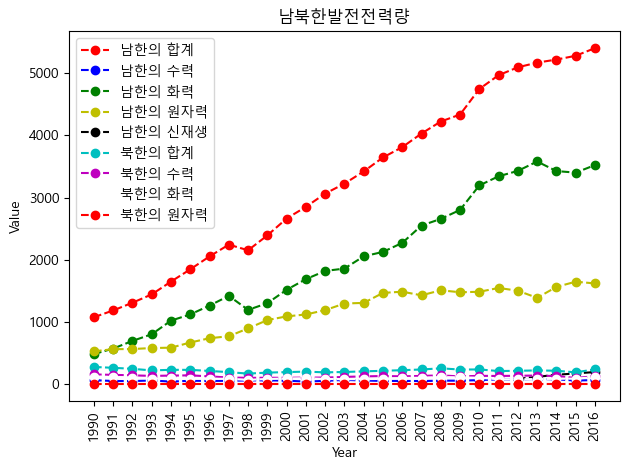

In [20]:

color = ["r", 'b', 'g', 'y', 'k', 'c', 'm', 'w', 'r']
legends = ['남한의 합계', '남한의 수력', '남한의 화력', '남한의 원자력', '남한의 신재생', '북한의 합계', '북한의 수력', '북한의 화력', '북한의 원자력']

for i in range(len(dataDF2.index)):
    if dataDF2.index[i][0] == "남한":
        plt.plot(dataDF2.columns, dataDF2.loc[(dataDF2.index[i][0], dataDF2.index[i][1])], color[i] + "o--", label = legends[i])
    elif dataDF2.index[i][0] ==  "북한":
        plt.plot(dataDF2.columns, dataDF2.loc[(dataDF2.index[i][0], dataDF2.index[i][1])], color[i] + "o--", label = legends[i])

plt.title("남북한발전전력량")
plt.ylabel("Value")
plt.xlabel("Year")
plt.xticks(rotation = 90)
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
def drawLineGraph(title, columns, labels, xlabel, ylabel):
    for col in columns:
        plt.plot(dataDF.loc[col], 'bo-', label = f"{col}")
    
    for idx, col in enumerate(columns):
        plt.plot(dataDF.loc[col], 'bo-', label = f"{labels[idx]}")
        
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.xticks(rotation = 90)
    plt.show()

In [22]:
drawLineGraph("TEST", 
            [("남한", "수력"), ("북한", "수력")], 
            ["남한-수력", "북한-수력"],
            '년도', '발전량')

KeyError: '수력'

- 하나의 figure에 여러 개 그래프 넣기

In [ ]:
# - figure 객체 생성
# - 생성된 figure 객체 안에 subplot 객체 생성
#   * 그래프를 표시 방식 지정 : 가로 / 세로 몇 개 그래프 넣을 지 지정
# - subplot에 그래프를 넣기

ValueError: Incorrect use of keyword argument 'set_rotation'. Keyword arguments other than 'minor' modify the text labels and can only be used if 'labels' are passed as well.

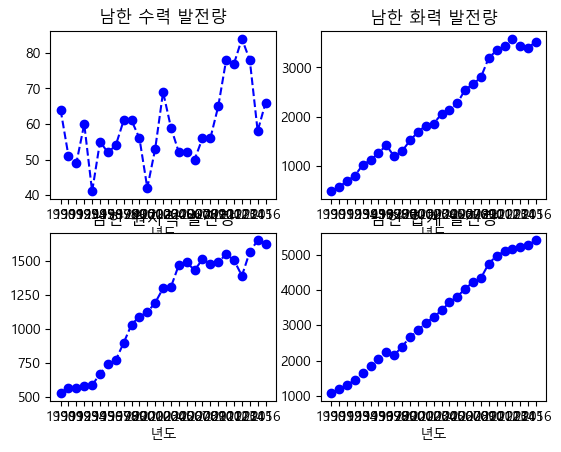

In [36]:
# -> 하나의 Figure에서 수력/화력/원자력/합계 그래프 넣기
fig = plt.figure()

# - add_subplot(행수, 열수, 번호)
axis1 = fig.add_subplot(2, 2, 1)
axis2 = fig.add_subplot(2, 2, 2)
axis3 = fig.add_subplot(2, 2, 3)
axis4 = fig.add_subplot(2, 2, 4)

# - 각 subplot에 그래프 넣기
axis1.plot(dataDF2.columns, dataDF2.loc[(dataDF2.index[1][0], dataDF2.index[1][1])], "bo--", label = '남한 - 수력')
axis2.plot(dataDF2.columns, dataDF2.loc[(dataDF2.index[2][0], dataDF2.index[2][1])], "bo--", label = '남한 - 화력')
axis3.plot(dataDF2.columns, dataDF2.loc[(dataDF2.index[3][0], dataDF2.index[3][1])], "bo--", label = '남한 - 원자력')
axis4.plot(dataDF2.columns, dataDF2.loc[(dataDF2.index[0][0], dataDF2.index[0][1])], "bo--", label = '남한 - 합계')

# - 각 subplot별로 설정
axis1.set_title('남한 수력 발전량')
axis1.set_xlabel('년도')

axis2.set_title('남한 화력 발전량')
axis2.set_xlabel('년도')

axis3.set_title('남한 원자력 발전량')
axis3.set_xlabel('년도')

axis4.set_title('남한 합계 발전량')
axis4.set_xlabel('년도')
# axis4.set_xticks(dataDF2.columns, rotation = 'vertical')

plt.tight_layout()
plt.legend()
plt.show()

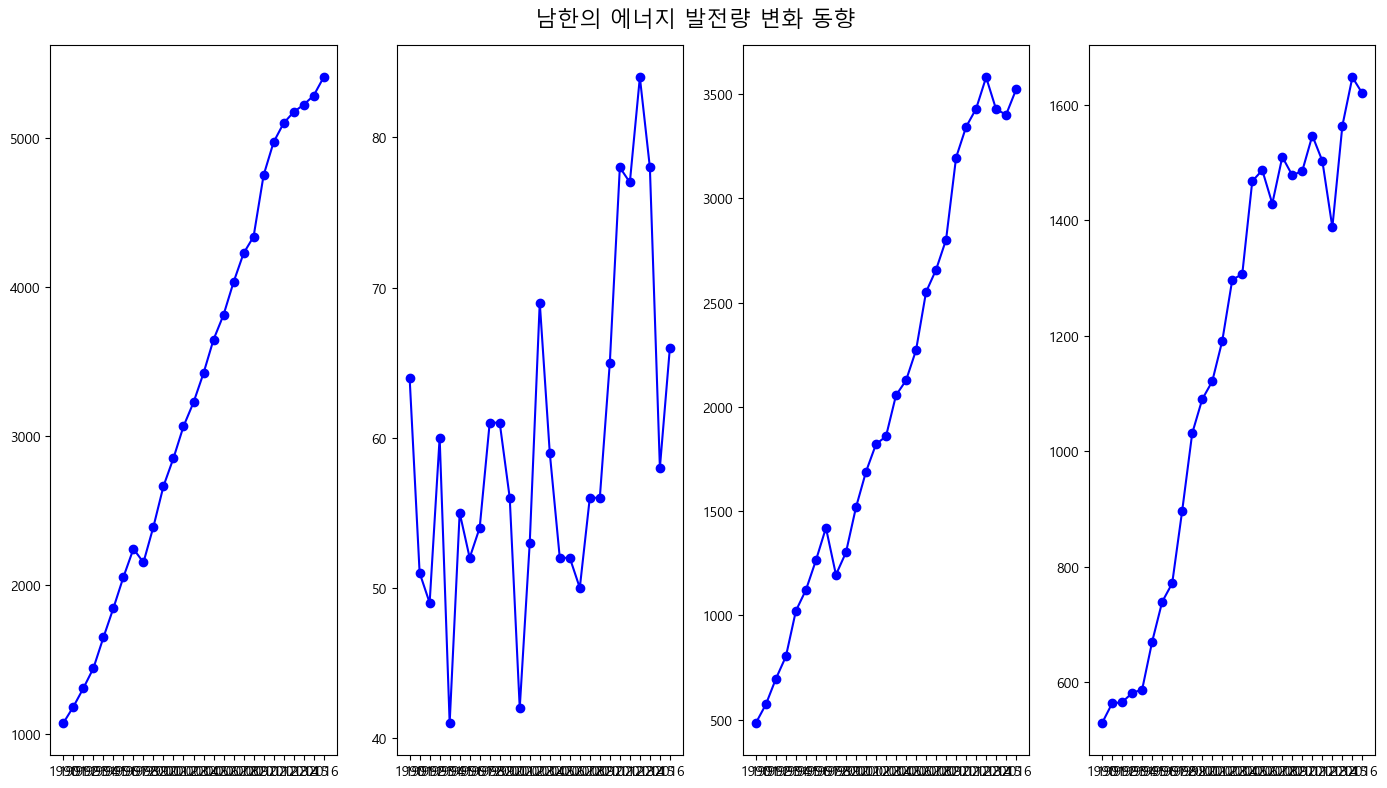

In [68]:
# -> 하나의 Figure에서 수력/화력/원자력/합계 그래프 넣기
fig = plt.figure(figsize = (14, 8))

# - subplot 객체 생성: subplots() => axes 객체를 배열에 담아서 반환
#                                => 행 단위로 axes 담아서 반환
axes = fig.subplots(1, 4)

# axes = fig.subplots(1, 4)
# print(axes)

# - subplot에 그래프 넣기
i = 0
while (dataDF2.index[i][0] == "남한") and (dataDF2.index[i][1] != "신재생"):
    axes[i].plot(dataDF2.columns, dataDF2.loc[(dataDF2.index[i])], "bo-")
    i += 1

# - 전체 창 즉, figure 설정
fig.suptitle("남한의 에너지 발전량 변화 동향", fontsize = 16)

# 화면에 띄우기
plt.tight_layout()
plt.show()

In [61]:
dataDF2.index.to_list()

[('남한', '합계'),
 ('남한', '수력'),
 ('남한', '화력'),
 ('남한', '원자력'),
 ('남한', '신재생'),
 ('북한', '합계'),
 ('북한', '수력'),
 ('북한', '화력'),
 ('북한', '원자력')]

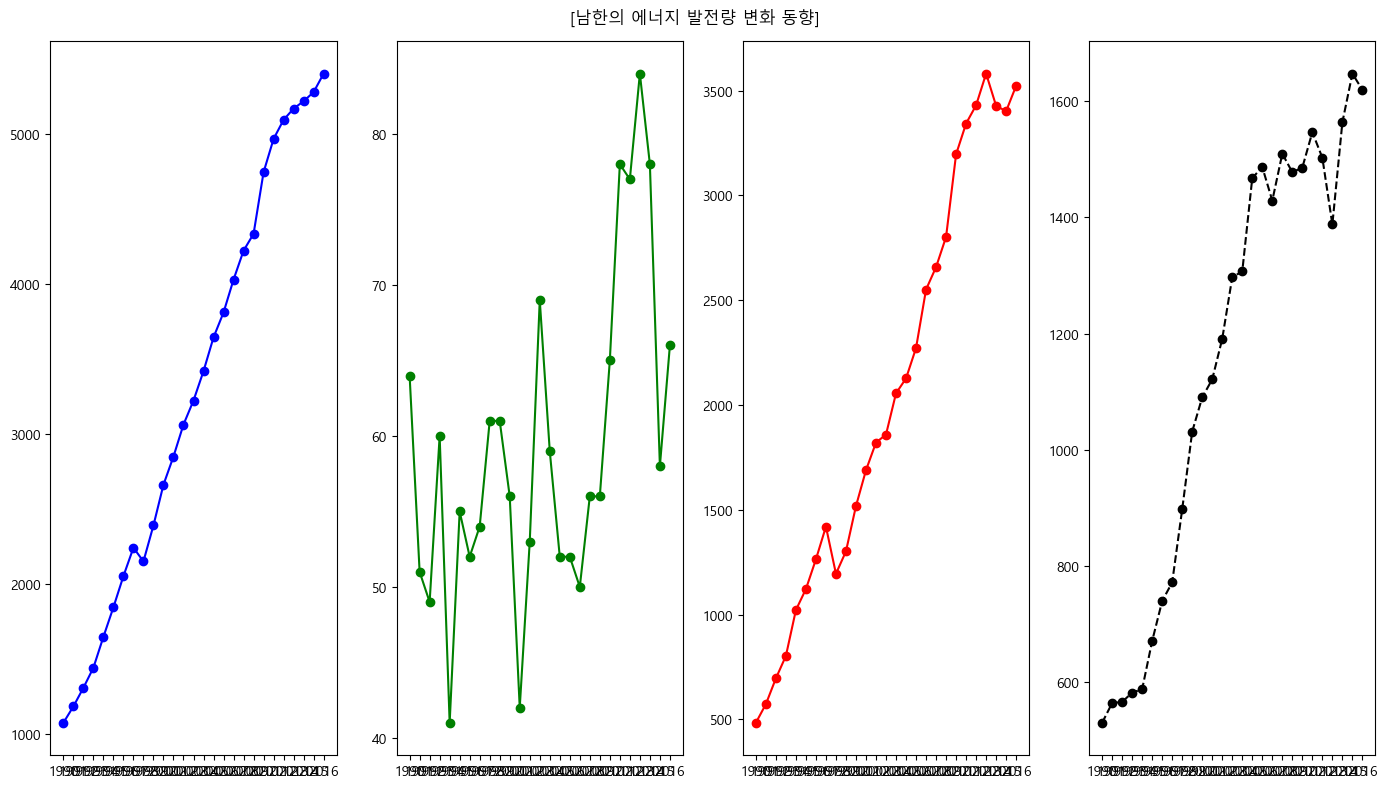

In [67]:
# -> 하나의 Figure에서 수력/화력/원자력/합계 그래프 넣기
fig = plt.figure(figsize = (14, 8))

# - subplot 객체 생성: subplots() => axes 객체를 배열에 담아서 반환
#                                => 행 단위로 axes 담아서 반환
axes = fig.subplots(1, 4)

# axes = fig.subplots(1, 4)
# print(axes)

# - subplot에 그래프 넣기
datas = dataDF2.index.to_list()[:4]
fmfs = ['bo-', 'go-', 'ro-', 'ko--']
for idx, ax in enumerate(axes):
    ax.plot(dataDF2.loc[datas[idx]], fmfs[idx])

fig.suptitle("[남한의 에너지 발전량 변화 동향]", fontsize = 12)

# 화면에 띄우기
plt.tight_layout()
plt.show()